<a href="https://colab.research.google.com/github/imammarzuki/Eksperimen/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
place=pd.read_csv("drive/MyDrive/S3/Eksperimen/Data/tourism_with_id.csv")
rating=pd.read_csv("drive/MyDrive/S3/Eksperimen/Data/tourism_rating.csv")
user=pd.read_csv("drive/MyDrive/S3/Eksperimen/Data/user.csv")

In [ ]:
place.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [ ]:
place1=place[["Place_Id", "Place_Name", "Description", "Category", "City", "Price", "Rating"]]

In [ ]:
place1.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating'],
      dtype='object')

In [ ]:
rating.columns

Index(['User_Id', 'Place_Id', 'Place_Ratings'], dtype='object')

In [ ]:
user.columns

Index(['User_Id', 'Location', 'Age'], dtype='object')

In [ ]:
data1=pd.merge(rating, place1, on="Place_Id")

In [ ]:
data1.columns

Index(['User_Id', 'Place_Id', 'Place_Ratings', 'Place_Name', 'Description',
       'Category', 'City', 'Price', 'Rating'],
      dtype='object')

In [ ]:
data1

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
...,...,...,...,...,...,...,...,...,...
9995,240,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6
9996,247,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6
9997,261,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6
9998,267,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6


In [ ]:
data2=pd.merge(user, data1,on="User_Id")

In [ ]:
dataset=data2[data2['City']=='Surabaya']

In [ ]:
dataset.head()

,User_Id,Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
9,1,"Semarang, Jawa Tengah",20,393,5,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4
13,1,"Semarang, Jawa Tengah",20,405,5,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000,4.4
20,1,"Semarang, Jawa Tengah",20,428,3,Monumen Bambu Runcing Surabaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Budaya,Surabaya,0,4.6
42,2,"Bekasi, Jawa Barat",21,413,3,Museum TNI AL Loka Jala Crana,Museum Loka Jala Crana berdiri pada tanggal 19...,Budaya,Surabaya,2000,4.5
44,2,"Bekasi, Jawa Barat",21,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8


In [ ]:
dataset=dataset.reset_index(drop=True)

In [ ]:
dataset=dataset.rename({"Location":"User Location"}, axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        1050 non-null   int64  
 1   User Location  1050 non-null   object 
 2   Age            1050 non-null   int64  
 3   Place_Id       1050 non-null   int64  
 4   Place_Ratings  1050 non-null   int64  
 5   Place_Name     1050 non-null   object 
 6   Description    1050 non-null   object 
 7   Category       1050 non-null   object 
 8   City           1050 non-null   object 
 9   Price          1050 non-null   int64  
 10  Rating         1050 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 90.4+ KB


Sudah tidak ada missing value

In [ ]:
dataset[dataset.duplicated()==True]

,User_Id,User Location,Age,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
29,9,"Surabaya, Jawa Timur",38,402,3,Food Junction Grand Pakuwon,Food Junction Grand Pakuwon sebetulnya merupak...,Pusat Perbelanjaan,Surabaya,0,4.5
41,13,"Depok, Jawa Barat",18,398,2,Taman Buah Surabaya,Wisata Taman Buah Undaan di Surabaya adalah sa...,Taman Hiburan,Surabaya,0,4.1
115,33,"Ponorogo, Jawa Timur",24,416,5,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4
187,57,"Yogyakarta, DIY",21,413,3,Museum TNI AL Loka Jala Crana,Museum Loka Jala Crana berdiri pada tanggal 19...,Budaya,Surabaya,2000,4.5
312,93,"Lampung, Sumatera Selatan",18,411,1,Masjid Muhammad Cheng Hoo,Masjid Cheng Hoo Surabaya adalah Masjid bernua...,Tempat Ibadah,Surabaya,0,4.7
419,123,"Bekasi, Jawa Barat",32,421,1,Museum Kesehatan Dr. Adhyatma,"Museum Kesehatan Dr. Adhyatma, MPH adalah muse...",Budaya,Surabaya,10000,4.4
737,213,"Bekasi, Jawa Barat",20,418,2,Museum Sepuluh Nopember Kota Surabaya,Museum Sepuluh November Surabaya adalah salah ...,Budaya,Surabaya,5000,4.7
802,230,"Ponorogo, Jawa Timur",20,396,5,Monumen Kapal Selam,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Budaya,Surabaya,15000,4.4
810,234,"Tanggerang, Banten",27,437,3,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8
1009,289,"Yogyakarta, DIY",35,413,1,Museum TNI AL Loka Jala Crana,Museum Loka Jala Crana berdiri pada tanggal 19...,Budaya,Surabaya,2000,4.5


Masih ada beberapa data yang duplikat, akan saya tangani

In [ ]:
# Menghapus data duplikat

dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

Sudah tidak ada yang duplikat

#EDA

In [ ]:
nums = ['Price', 'Rating', 'Age']
cats = ['Place_Name', 'Category', 'User Location']

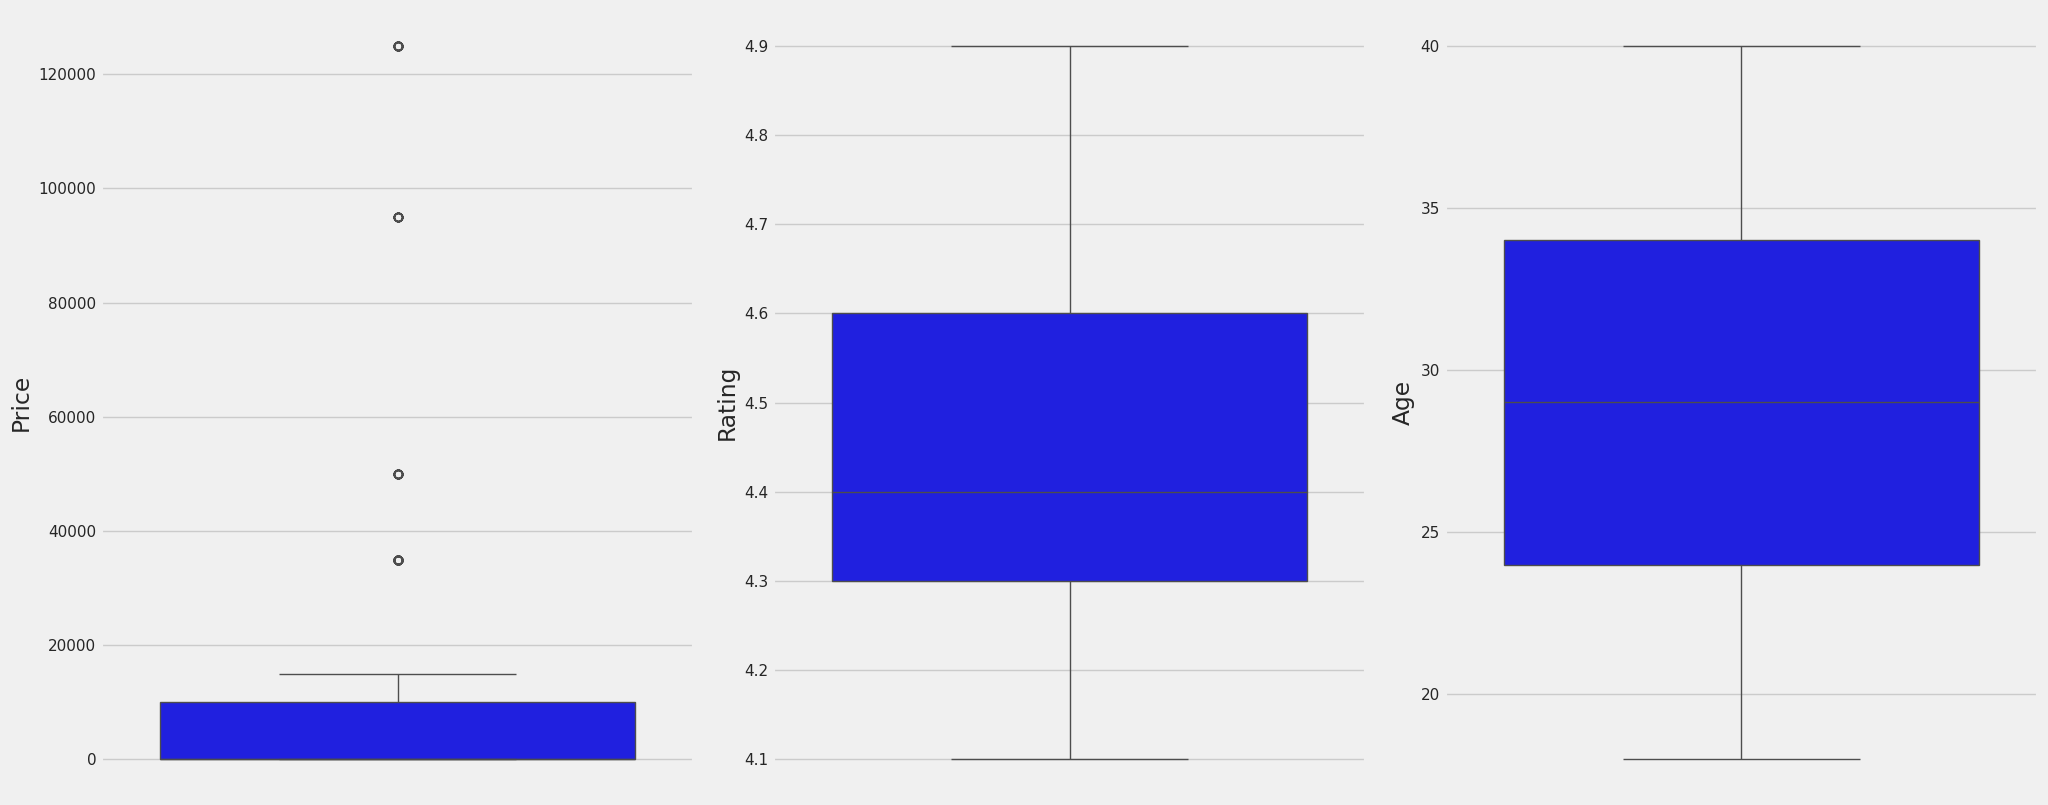

In [ ]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=dataset[nums[i]], color='blue', orient='v')
    plt.tight_layout()

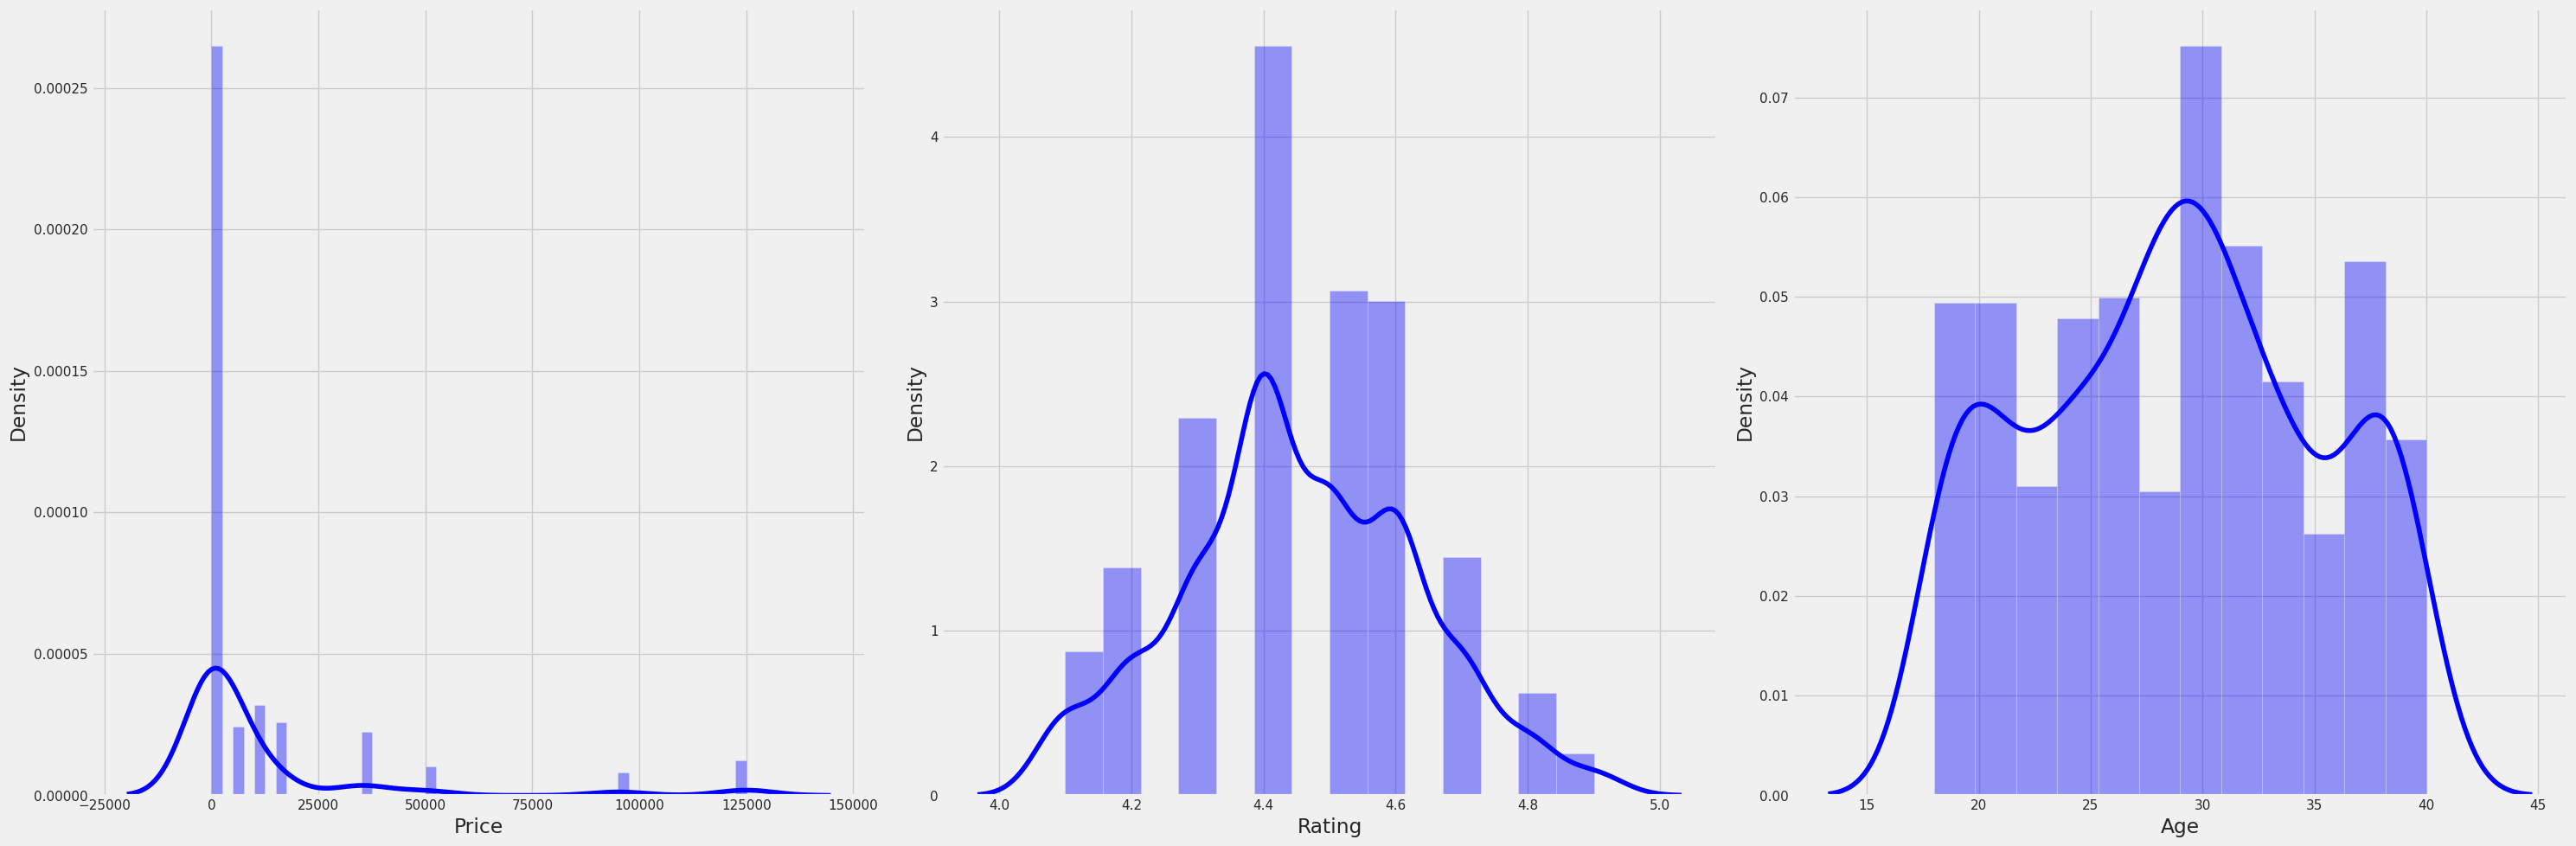

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(dataset[nums[i]], color='blue')
    plt.tight_layout()

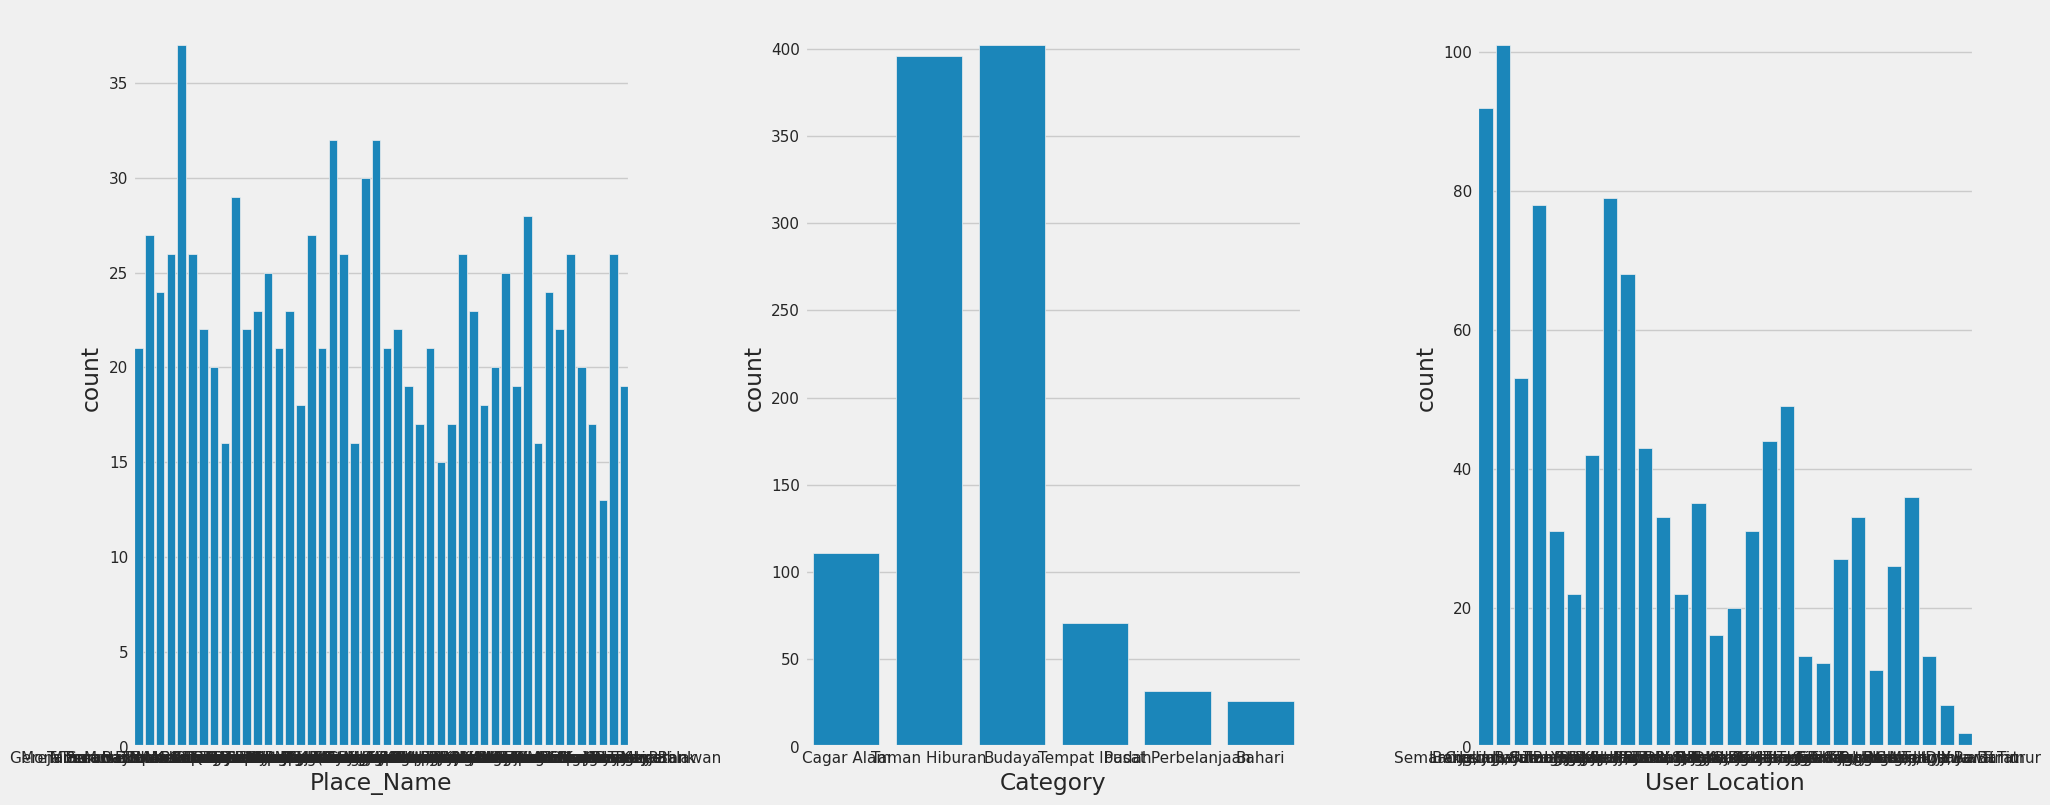

In [ ]:
for i in range(len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(x=dataset[cats[i]])
  plt.tight_layout()

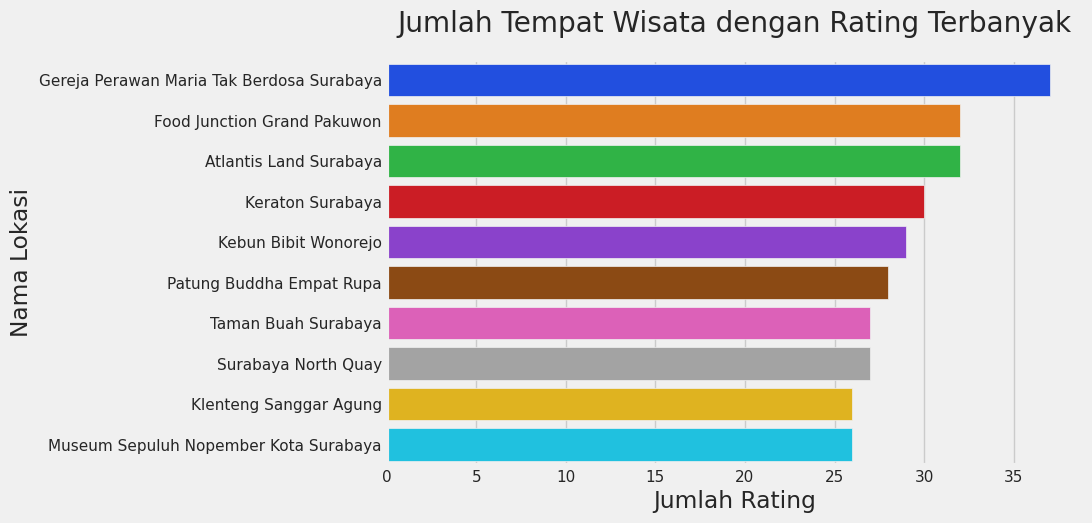

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y='Place_Name', x='count', data=dataset['Place_Name'].value_counts().reset_index()[:10], palette='bright')
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Lokasi')
plt.show()

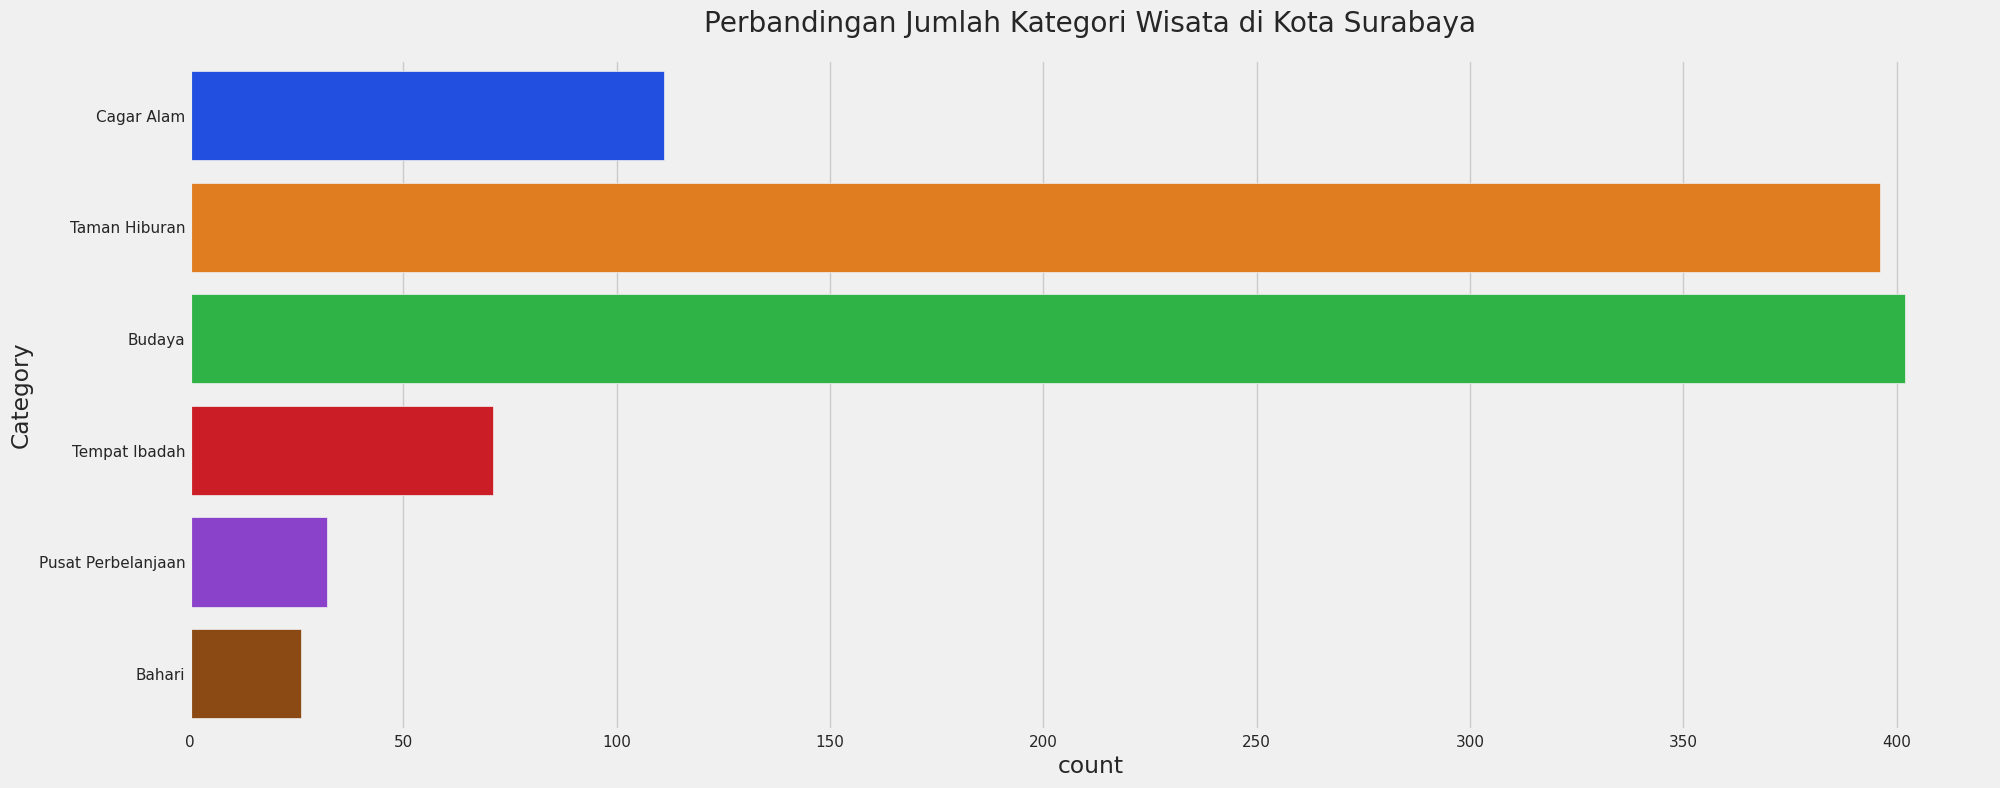

In [ ]:
sns.countplot(y='Category', data=dataset, palette='bright')
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Surabaya', pad=20)
plt.show()

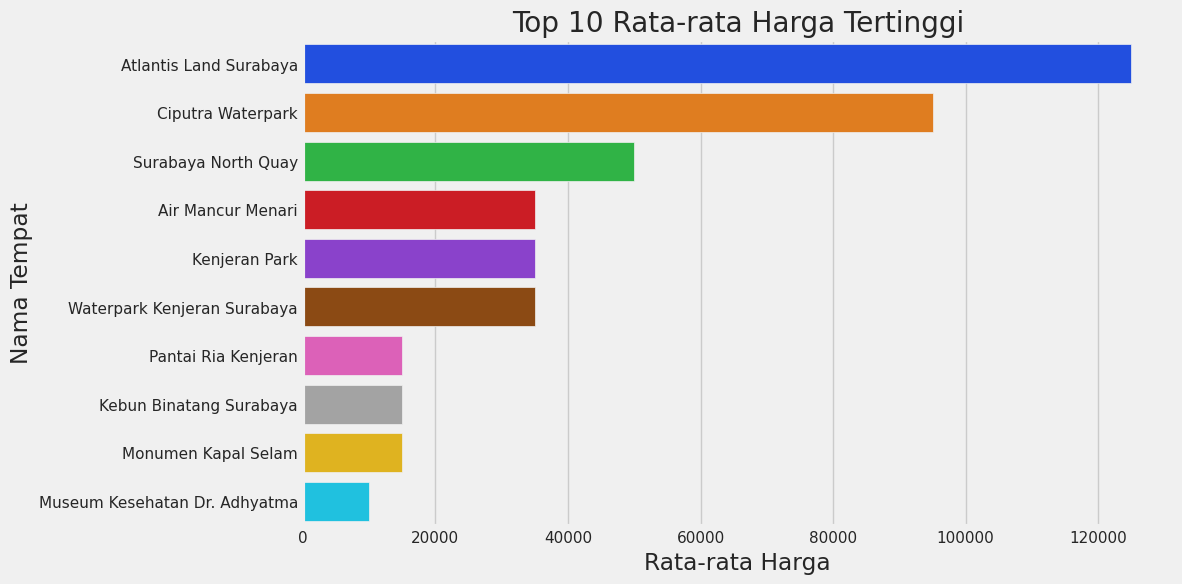

In [ ]:
top_price_place = dataset.groupby('Place_Name')['Price'] \
.mean().reset_index().sort_values(by='Price', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(y='Place_Name', x='Price', data=top_price_place, palette='bright')
plt.title('Top 10 Rata-rata Harga Tertinggi')
plt.ylabel('Nama Tempat')
plt.xlabel('Rata-rata Harga')
plt.show()

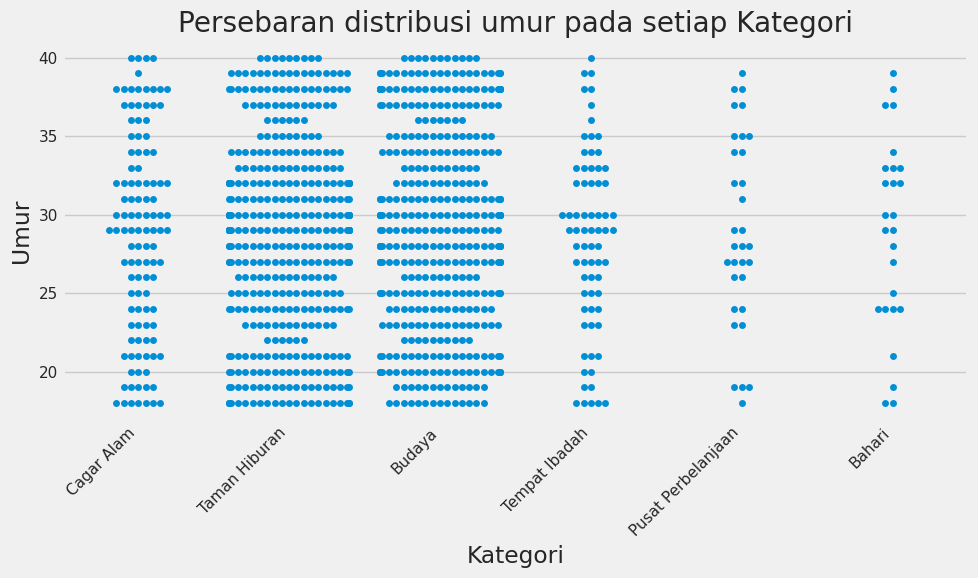

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=dataset, x='Category', y='Age')
plt.title('Persebaran distribusi umur pada setiap Kategori')
plt.xlabel('Kategori')
plt.ylabel('Umur')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

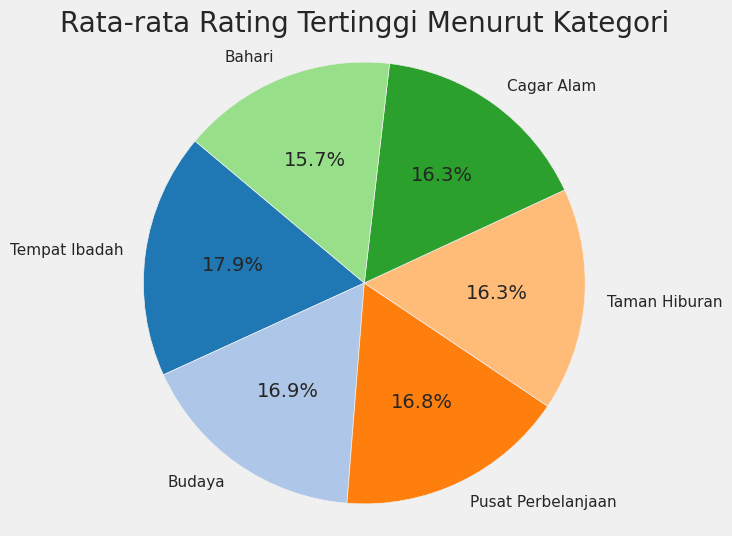

In [ ]:
category_rating = dataset.groupby('Category')['Rating'] \
.mean().reset_index().sort_values(by='Rating', ascending=False)

categories = category_rating['Category']
ratings = category_rating['Rating']
colors = plt.cm.tab20.colors[:len(categories)]

plt.figure(figsize=(6, 6))
plt.pie(ratings, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Rata-rata Rating Tertinggi Menurut Kategori')
plt.axis('equal')
plt.show()

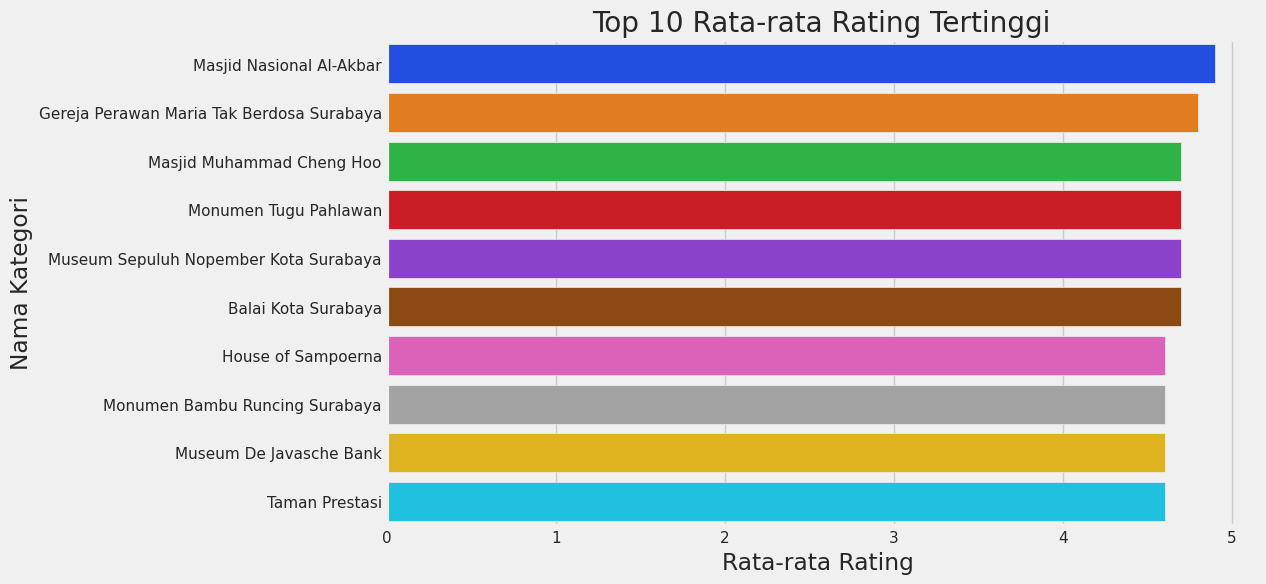

In [ ]:
top_place_rating = dataset.groupby('Place_Name')['Rating'] \
.mean().reset_index().sort_values(by='Rating', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(y='Place_Name', x='Rating', data=top_place_rating, palette='bright')
plt.title('Top 10 Rata-rata Rating Tertinggi')
plt.ylabel('Nama Kategori')
plt.xlabel('Rata-rata Rating ')
plt.show()

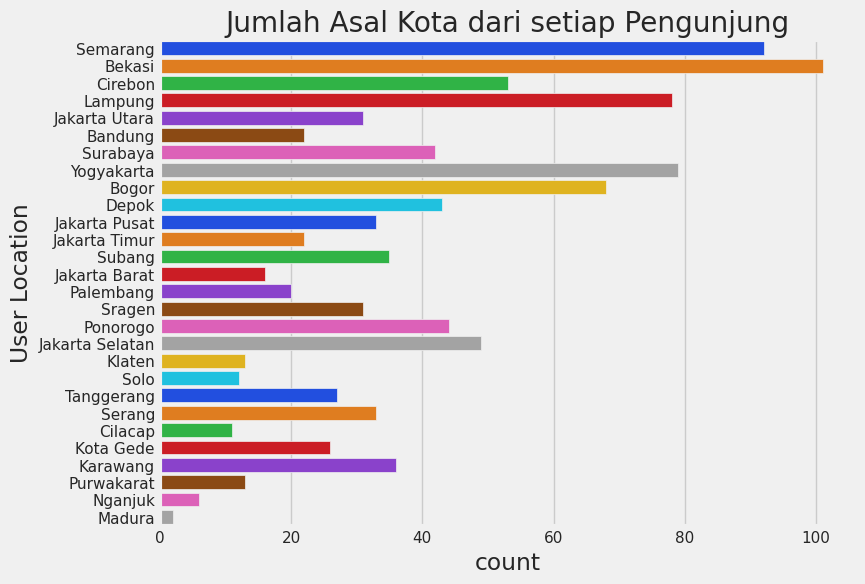

In [ ]:
askot = dataset['User Location'].apply(lambda x : x.split(',')[0])

plt.figure(figsize=(8,6))
sns.countplot(y=askot, palette='bright')
plt.title('Jumlah Asal Kota dari setiap Pengunjung')
plt.show()

<Axes: >

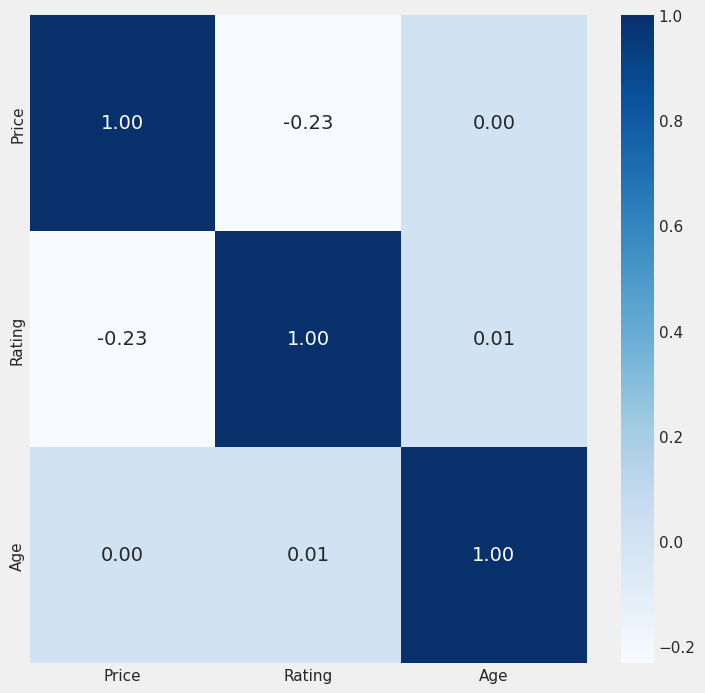

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(dataset[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

#Pre-processing